In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn-dark")
matplotlib.rcParams['figure.figsize'] = [14,14]
np.random.seed(42)

In [2]:
from sklearn.datasets import make_circles

In [3]:
X, clases_reales = make_circles(5000, factor=.3, noise=.05)

In [4]:
X

array([[-0.7119167 , -0.54660896],
       [ 0.30695062, -0.00702791],
       [ 0.28819339,  0.12328432],
       ...,
       [ 0.06201882,  0.38323988],
       [-0.24082708,  0.00913113],
       [-0.5933083 ,  0.85134228]])

In [5]:
clases_reales

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

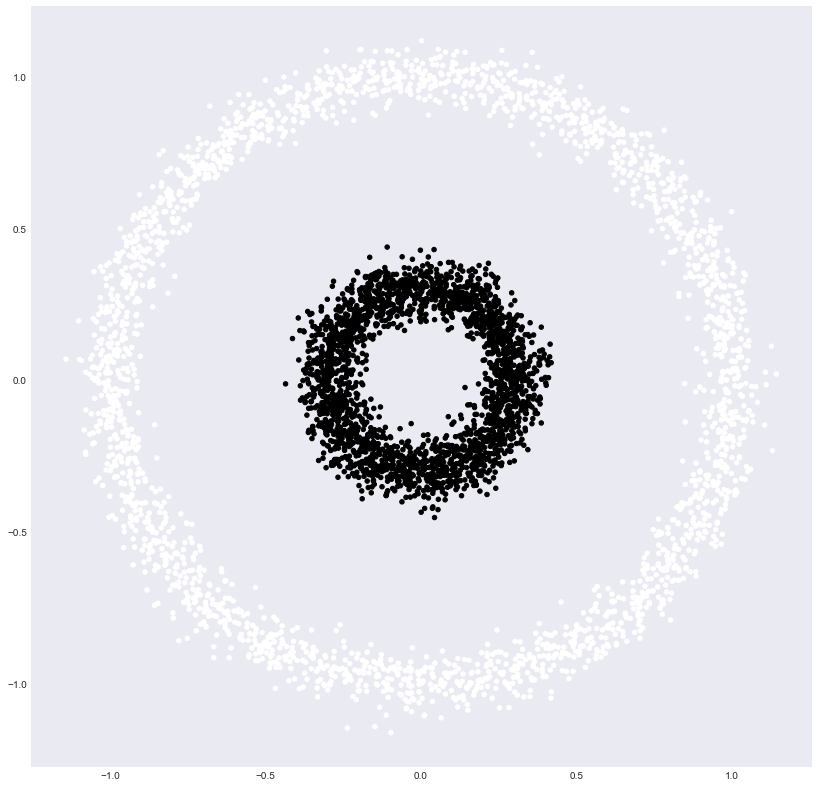

In [6]:
plt.scatter(X[:,0], X[:,1], c=clases_reales, marker='o', s=20)
plt.show()

In [7]:
from sklearn.cluster import KMeans, DBSCAN
# la silueta mide la calidad de los resultados en un algoritmo de clustering
# silueta: mide la consistencia (cohesion) de los datos de un cluster.
# va de -1 a 1, en donde uno es mejor cohesion de los datos
# homogeneidad y completitud
from sklearn.metrics import silhouette_score, homogeneity_completeness_v_measure 

In [8]:
estimador_kmeans = KMeans(n_clusters=2)
etiquetas_kmeans = estimador_kmeans.fit(X).labels_

In [9]:
etiquetas_kmeans

array([0, 1, 1, ..., 0, 0, 0])

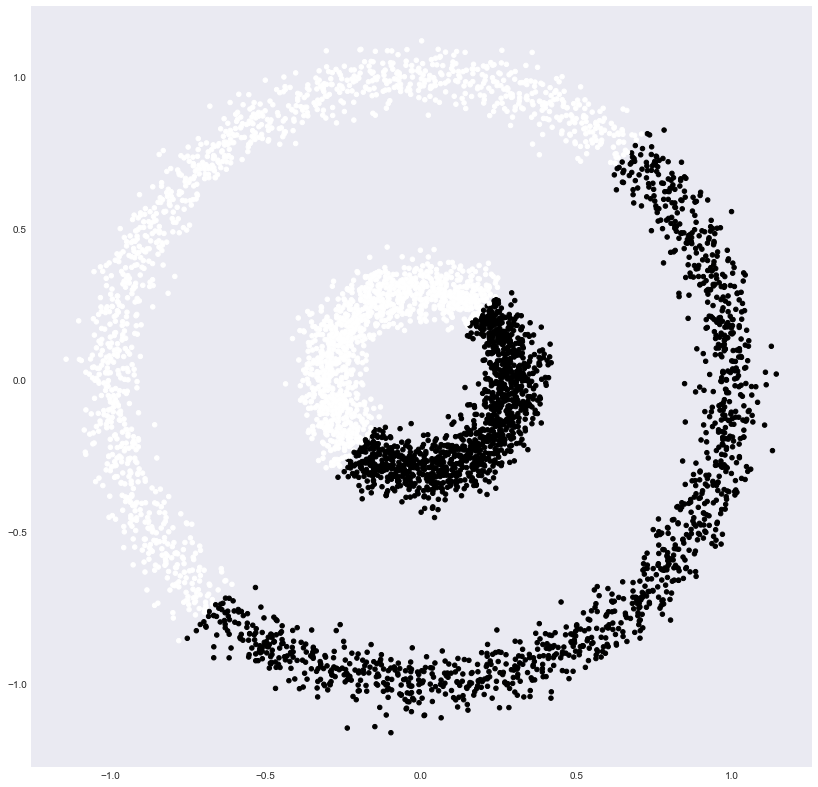

In [10]:
plt.scatter(X[:,0], X[:,1], c=etiquetas_kmeans, marker='o', s=20)
plt.show()

In [11]:
# crear funciones que calculen errores
# indice de jaccard => mide la similitud de dos conjuntos de puntos  
# puede tomar dos valores: [0,1] => (A interseccion B)/(A union B)
from itertools import product

In [12]:
# indice de jaccard
def indice_jaccard(clus1, clus2):
    inter = np.intersect1d(clus1, clus2).shape[0] # elementos de la interseccion
    union = np.union1d(clus1, clus2).shape[0] # elementos de la union
    return inter/union

In [13]:
list(product([1,3],[5,7]))

[(1, 5), (1, 7), (3, 5), (3, 7)]

In [14]:
print(clases_reales)
print(etiquetas_kmeans)

[0 1 1 ... 1 1 0]
[0 1 1 ... 0 0 0]


In [15]:
# definimos una funcion para igualar las clases con los cluster
def igualar_cluster_clases(clusters, clases):
    combinaciones = product(np.unique(clases), np.unique(clusters))
    pares = {}
    class_ids = np.unique(clases)
    clusters_id = np.unique(clusters)
    for clu_id in clusters_id:
        tmp_jac = 0
        for class_id in class_ids:
            new_jac = indice_jaccard(X[clases == class_id], X[clusters == clu_id])
            if new_jac > tmp_jac:
                tmp_jac = new_jac
                pares[clu_id] = class_id
                if new_jac >= 0.5:
                    break
    return pares

In [16]:
igualar_cluster_clases(etiquetas_kmeans, clases_reales)

{0: 0, 1: 1}

In [17]:
# funciones que igualan los valores en los dataset
def igualar_cluster(clusters, clases):
    para_reemplazo = igualar_cluster_clases(clusters, clases)
    cluster_igualados = [para_reemplazo[x] for x in clusters]
    return np.array(cluster_igualados)

In [18]:
# funcion para determinar los errores
def errores(clusters, clases):
    etiquetas = igualar_cluster(clusters, clases)
    return X[clases != etiquetas]

In [19]:
from matplotlib import cm

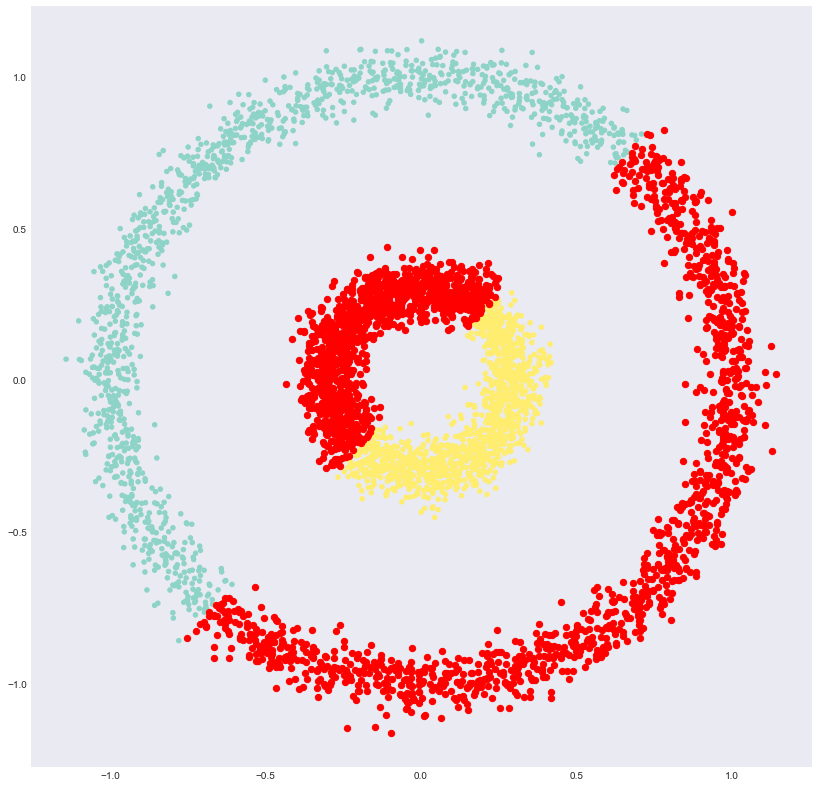

In [20]:
errores_kmedias = errores(etiquetas_kmeans, clases_reales)
plt.scatter(X[:,0], X[:,1], c=etiquetas_kmeans, s=20, marker='o', cmap=cm.Set3)
plt.scatter(errores_kmedias[:,0], errores_kmedias[:,1], s=40, marker='o', color='red')
plt.show()

In [21]:
silhouette_score(X, etiquetas_kmeans)

0.2953356849696656

In [22]:
homogeneity_completeness_v_measure(clases_reales, etiquetas_kmeans)

(1.3965603437310233e-05, 1.3965798474337352e-05, 1.3965700955142846e-05)

DBSCAN

In [23]:
# ahora usamos un estimador DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=10)

In [24]:
etiquetas_dbscan = dbscan.fit(X).labels_
etiquetas_dbscan

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

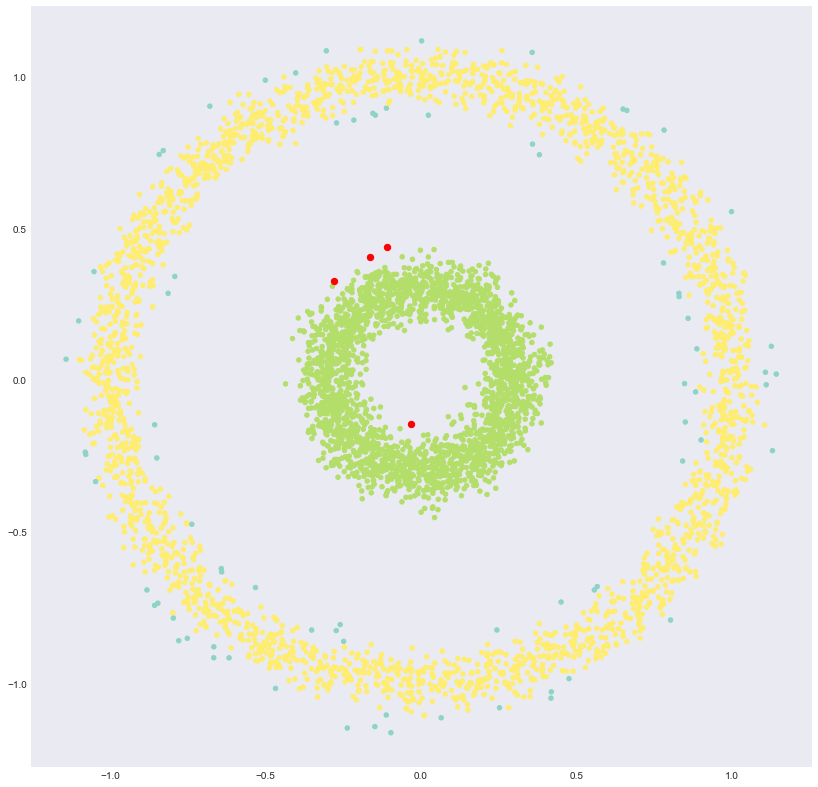

In [25]:
errores_dbscan = errores(etiquetas_dbscan, clases_reales)
plt.scatter(X[:,0], X[:,1], c=etiquetas_dbscan, s=20, marker='o', cmap=cm.Set3)
plt.scatter(errores_dbscan[:,0], errores_dbscan[:,1], s=40, marker='o', color='red')
plt.show()

In [28]:
# los puntos rojos son los mal clasificados
# los puntos verde oscuro son ruido

In [26]:
silhouette_score(X, etiquetas_dbscan)

0.20439415626880308

In [27]:
homogeneity_completeness_v_measure(clases_reales, etiquetas_dbscan)

(0.9954029426799706, 0.9023029711738355, 0.9465692509450734)